In [ ]:
import numpy as np
import pandas as pd
import sklearn as sklearn
import math
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
from keras.layers import Dense,Dropout

import warnings
from tensorflow import keras
from tensorflow.keras import layers

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp -r /content/drive/MyDrive/Colab Notebooks/CSV /content

cp: cannot stat '/content/drive/MyDrive/Colab': No such file or directory
cp: cannot stat 'Notebooks/CSV': No such file or directory


In [ ]:
ac_col=['time','ac_x','ac_y','ac_z','a_ac']
gy_col=['time','gy_x','gy_y','gy_z','a_gy']
features=['ac_x','ac_y','ac_z','a_ac','gy_x','gy_y','gy_z','a_gy','jac_x','jac_y','jac_z','ja_ac','jgy_x','jgy_y','jgy_z','ja_gy']

In [ ]:
##### Number of data ###########
f_s=1
f_e=206
fall_number=0
w_s=1
w_e=222
walk_number=0
s_s=1
s_e=250
sit_number=0
bsc_s=1
bsc_e=253
bsc_number=0
laying_s=1
laying_e=247
laying_number=0
standing_s=1
standing_e=218
stand_number=0



In [ ]:
########### Loading Falling Data #########

file_name='Falling_ac'
fm='Falling_gy'
fall_ac=[]
fall_gy=[]
for i in range (f_s,f_e):
  fall_number+=1
  extra='_'+str(i)+'.csv'
  path='/content/drive/MyDrive/Colab Notebooks/CSV/Fall/'+file_name+extra
  path2='/content/drive/MyDrive/Colab Notebooks/CSV/Fall/'+fm+extra
  df=pd.read_csv(path,header=None,skiprows=1,names=ac_col)
  df2=pd.read_csv(path2,header=None,skiprows=1,names=gy_col)
  fall_ac.append(df)
  fall_gy.append(df2)


In [ ]:
########### Loading Walking Data #########

file_name='Walking_ac'
fm='Walking_gy'
walk_ac=[]
walk_gy=[]

for i in range (w_s,w_e):
  walk_number+=1
  extra='_'+str(i)+'.csv'
  path='/content/drive/MyDrive/Colab Notebooks/CSV/Walk/'+file_name+extra
  path2='/content/drive/MyDrive/Colab Notebooks/CSV/Walk/'+fm+extra
  df=pd.read_csv(path,header=None,skiprows=1,names=ac_col)
  df2=pd.read_csv(path2,header=None,skiprows=1,names=gy_col)
  walk_ac.append(df)
  walk_gy.append(df2)


In [ ]:
##### Loading Sitting Data ######################

file_name='Sitting_ac'
fm='Sitting_gy'
sit_ac=[]
sit_gy=[]

for i in range (s_s,s_e):
  sit_number+=1
  extra='_'+str(i)+'.csv'
  path='/content/drive/MyDrive/Colab Notebooks/CSV/Sit/'+file_name+extra
  path2='/content/drive/MyDrive/Colab Notebooks/CSV/Sit/'+fm+extra
  df=pd.read_csv(path,header=None,skiprows=1,names=ac_col)
  df2=pd.read_csv(path2,header=None,skiprows=1,names=gy_col)
  sit_ac.append(df)
  sit_gy.append(df2)



In [ ]:
##### Loading BSC Data ######################

file_name='BSC_ac'
fm='BSC_gy'
bsc_ac=[]
bsc_gy=[]

for i in range (bsc_s,bsc_e):
  bsc_number+=1
  extra='_'+str(i)+'.csv'
  path='/content/drive/MyDrive/Colab Notebooks/CSV/BSC/'+file_name+extra
  path2='/content/drive/MyDrive/Colab Notebooks/CSV/BSC/'+fm+extra
  df=pd.read_csv(path,header=None,skiprows=1,names=ac_col)
  df2=pd.read_csv(path2,header=None,skiprows=1,names=gy_col)
  bsc_ac.append(df)
  bsc_gy.append(df2)

In [ ]:
##### Loading Laying Data ######################

file_name='Laying_ac'
fm='Laying_gy'
laying_ac=[]
laying_gy=[]

for i in range (laying_s,laying_e):
  laying_number+=1
  extra='_'+str(i)+'.csv'
  path='/content/drive/MyDrive/Colab Notebooks/CSV/Laying/'+file_name+extra
  path2='/content/drive/MyDrive/Colab Notebooks/CSV/Laying/'+fm+extra
  df=pd.read_csv(path,header=None,skiprows=1,names=ac_col)
  df2=pd.read_csv(path2,header=None,skiprows=1,names=gy_col)
  laying_ac.append(df)
  laying_gy.append(df2)

In [ ]:
##### Loading Standing Data ######################

file_name='Standing_ac'
fm='Standing_gy'
stand_ac=[]
stand_gy=[]

for i in range (standing_s,standing_e):
  stand_number+=1
  extra='_'+str(i)+'.csv'
  path='/content/drive/MyDrive/Colab Notebooks/CSV/Standing/'+file_name+extra
  path2='/content/drive/MyDrive/Colab Notebooks/CSV/Standing/'+fm+extra
  df=pd.read_csv(path,header=None,skiprows=1,names=ac_col)
  df2=pd.read_csv(path2,header=None,skiprows=1,names=gy_col)
  stand_ac.append(df)
  stand_gy.append(df2)

In [ ]:
###plot
"""
temp=fall_ac[15]
temp['ac_x'].plot()
"""

"\ntemp=fall_ac[15]\ntemp['ac_x'].plot()\n"

In [ ]:
fall_jerk_ac=[]
fall_jerk_gy=[]
walk_jerk_ac=[]
walk_jerk_gy=[]
sit_jerk_ac=[]
sit_jerk_gy=[]
bsc_jerk_ac=[]
bsc_jerk_gy=[]
stand_jerk_ac=[]
stand_jerk_gy=[]
laying_jerk_ac=[]
laying_jerk_gy=[]


In [ ]:
def get_jerk(a,num):
  n=a.shape[0]
  if(num==1):
     x=np.array(a['ac_x'].astype(float))
     y=np.array(a['ac_y'].astype(float))
     z=np.array(a['ac_z'].astype(float))
     d=np.array(a['a_ac'].astype(float))
     columns=['jac_x','jac_y','jac_z','ja_ac']
  else:
     x=np.array(a['gy_x'].astype(float))
     y=np.array(a['gy_y'].astype(float))
     z=np.array(a['gy_z'].astype(float))
     d=np.array(a['a_gy'].astype(float))
     columns=['jgy_x','jgy_y','jgy_z','ja_gy']


  time=a['time']

  temx=[]
  ac=[]


  for i in range (1,n):
    temx=[]
    ax1=x[i-1]
    ax2=x[i]
    t1=time[i-1]
    t2=time[i]
    ay1=y[i-1]
    ay2=y[i]
    az1=z[i-1]
    az2=z[i]
    am1=d[i-1]
    am2=d[i]
    t0=t2-t1
    ax=ax2-ax1
    ax*=1000000000
    ax/=t0
    ay=ay2-ay1
    ay*=1000000000
    ay/=t0
    az=az2-az1
    az*=1000000000
    az/=t0

    am=am2-am1
    am*=1000000000
    am/=t0
    ax=round(ax,6)
    ay=round(ay,6)
    az=round(az,6)
    am=round(am,6)
    temx.append(ax)
    temx.append(ay)
    temx.append(az)
    temx.append(am)
    ac.append(temx)
  ac.append(temx)
  adf=pd.DataFrame(data=ac,columns=columns)
  return adf;

In [ ]:
############# Magnitude Signal """"""""""""""""""""""""
def mag(a,num):
  n=len(a)
  if(num==1):
     x=a['ac_x'].astype(float)
     y=a['ac_y'].astype(float)
     z=a['ac_z'].astype(float)
     columns=['time','ac_x','ac_y','ac_z','a_ac']
  else:
      x=a['gy_x'].astype(float)
      y=a['gy_y'].astype(float)
      z=a['gy_z'].astype(float)
      columns=['time','gy_x','gy_y','gy_z','a_gy']
  t=a['time']
  temx=[]
  ac=[]
  for i in range(0,n):
    temx=[]
    temx.append(t[i])
    p=x[i]
    q=y[i]
    r=z[i]
    sq=p*p+q*q+r*r
    sq=np.sqrt(sq)
    temx.append(x[i])
    temx.append(y[i])
    temx.append(z[i])
    temx.append(sq)
    ac.append(temx)

  adf=pd.DataFrame(data=ac,columns=columns)
  return adf;

Data Processor

In [ ]:
def process_data(a,b,num):
  if(len(a)>len(b)):
    n=len(a)
    mn=len(b)
  else:
    n=len(b)
    mn=len(a)
  factor=int(n/mn)

  ac=[]
  gg=[]
  if(num==1):
    if(len(a)>len(b)):
      x=a['ac_x'].astype(float)
      y=a['ac_y'].astype(float)
      z=a['ac_z'].astype(float)
      m=a['a_ac'].astype(float)
      ga=b['gy_x'].astype(float)
      gb=b['gy_y'].astype(float)
      gc=b['gy_z'].astype(float)
      gm=b['a_gy'].astype(float)
    else:
      x=b['gy_x'].astype(float)
      y=b['gy_y'].astype(float)
      z=b['gy_z'].astype(float)
      m=b['a_gy'].astype(float)
      ga=a['ac_x'].astype(float)
      gb=a['ac_y'].astype(float)
      gc=a['ac_z'].astype(float)
      gm=a['a_ac'].astype(float)
    columns=['ac_x','ac_y','ac_z','a_ac']
    col2=['gy_x','gy_y','gy_z','a_gy']
  else:
     columns=['jac_x','jac_y','jac_z','ja_ac']
     col2=['jgy_x','jgy_y','jgy_z','ja_gy']
     if(len(a)>len(b)):
       x=a['jac_x'].astype(float)
       y=a['jac_y'].astype(float)
       z=a['jac_z'].astype(float)
       m=a['ja_ac'].astype(float)
       ga=b['jgy_x'].astype(float)
       gb=b['jgy_y'].astype(float)
       gc=b['jgy_z'].astype(float)
       gm=b['ja_gy'].astype(float)
     else:
       x=b['jgy_x'].astype(float)
       y=b['jgy_y'].astype(float)
       z=b['jgy_z'].astype(float)
       m=b['ja_gy'].astype(float)
       ga=a['jac_x'].astype(float)
       gb=a['jac_y'].astype(float)
       gc=a['jac_z'].astype(float)
       gm=a['ja_ac'].astype(float)

  idx=0
  for i in range (1,mn-1):
    ax=0
    ay=0
    az=0
    am=0
    gx=0
    gy=0
    gz=0
    gt=0
    temx=[]
    temp=[]
    for k in range (0,factor):
      if(idx+k>=n):
        break
      ax=ax+x[idx+k]
      ay=ay+y[idx+k]
      az=az+z[idx+k]
      am=am+m[idx+k]
      idx=idx+factor
    ax/=factor
    ay/=factor
    az/=factor
    am/=factor
    gx=ga[i]
    gy=gb[i]
    gz=gc[i]
    gt=gm[i]
    if(ax<0):
      ax=ax*-1
    if(ay<0):
      ay=ay*-1
    if(az<0):
      az=az*-1
    if(gx<0):
      gx=gx*-1
    if(gy<0):
      gy=gy*-1
    if(gz<0):
      gz=gz*-1
    temx.append(round(ax,6))
    temx.append(round(ay,6))
    temx.append(round(az,6))
    temx.append(round(am,6))
    ac.append(temx)
    temp.append(round(gx,6))
    temp.append(round(gy,6))
    temp.append(round(gz,6))
    temp.append(round(gt,6))
    gg.append(temp)
  adf=pd.DataFrame(data=ac,columns=columns)
  gdf=pd.DataFrame(data=gg,columns=col2)
  #print(adf.head(10))
  #print(gdf.head(10))
  #print(adf.shape,' ',gdf.shape)
  return adf,gdf



In [ ]:
for i in range(0,fall_number):
  fall_ac[i]=mag(fall_ac[i],1)
  fall_gy[i]=mag(fall_gy[i],2)

for i in range(0,walk_number):
  walk_ac[i]=mag(walk_ac[i],1)
  walk_gy[i]=mag(walk_gy[i],2)

for i in range(0,sit_number):
  sit_ac[i]=mag(sit_ac[i],1)
  sit_gy[i]=mag(sit_gy[i],2)

for i in range(0,bsc_number):
  bsc_ac[i]=mag(bsc_ac[i],1)
  bsc_gy[i]=mag(bsc_gy[i],2)

for i in range(0,laying_number):
  laying_ac[i]=mag(laying_ac[i],1)
  laying_gy[i]=mag(laying_gy[i],2)

for i in range(0,stand_number):
  stand_ac[i]=mag(stand_ac[i],1)
  stand_gy[i]=mag(stand_gy[i],2)

In [ ]:

##### Fall Jerk ##############
for i in range(0,fall_number):
  a=get_jerk(fall_ac[i],1)
  b=get_jerk(fall_gy[i],2)
  fall_jerk_ac.append(a)
  fall_jerk_gy.append(b)

#### Sitting jerk signal ######

for i in range(0,sit_number):
  a=get_jerk(sit_ac[i],1)
  b=get_jerk(sit_gy[i],2)
  sit_jerk_ac.append(a)
  sit_jerk_gy.append(b)

########## Walk Jerk signal #########
for i in range(0,walk_number):
  a=get_jerk(walk_ac[i],1)
  b=get_jerk(walk_gy[i],2)
  walk_jerk_ac.append(a)
  walk_jerk_gy.append(b)

#### Standing jerk signal ######

for i in range(0,stand_number):
  a=get_jerk(stand_ac[i],1)
  b=get_jerk(stand_gy[i],2)
  stand_jerk_ac.append(a)
  stand_jerk_gy.append(b)


#### Laying jerk signal ######

for i in range(0,laying_number):
  a=get_jerk(laying_ac[i],1)
  b=get_jerk(laying_gy[i],2)
  laying_jerk_ac.append(a)
  laying_jerk_gy.append(b)


#### BSC jerk signal ######

for i in range(0,bsc_number):
  a=get_jerk(bsc_ac[i],1)
  b=get_jerk(bsc_gy[i],2)
  bsc_jerk_ac.append(a)
  bsc_jerk_gy.append(b)



In [ ]:
for i in range(0,fall_number):
  fall_ac[i],fall_gy[i]=process_data(fall_ac[i],fall_gy[i],1)
  fall_jerk_ac[i],fall_jerk_gy[i]=process_data(fall_jerk_ac[i],fall_jerk_gy[i],2)

for i in range(0,stand_number):
  stand_ac[i],stand_gy[i]=process_data(stand_ac[i],stand_gy[i],1)
  stand_jerk_ac[i],stand_jerk_gy[i]=process_data(stand_jerk_ac[i],stand_jerk_gy[i],2)

for i in range(0,walk_number):
  walk_ac[i],walk_gy[i]=process_data(walk_ac[i],walk_gy[i],1)
  walk_jerk_ac[i],walk_jerk_gy[i]=process_data(walk_jerk_ac[i],walk_jerk_gy[i],2)


for i in range(0,laying_number):
  laying_ac[i],laying_gy[i]=process_data(laying_ac[i],laying_gy[i],1)
  laying_jerk_ac[i],laying_jerk_gy[i]=process_data(laying_jerk_ac[i],laying_jerk_gy[i],2)


for i in range(0,sit_number):
  sit_ac[i],sit_gy[i]=process_data(sit_ac[i],sit_gy[i],1)
  sit_jerk_ac[i],sit_jerk_gy[i]=process_data(sit_jerk_ac[i],sit_jerk_gy[i],2)

for i in range(0,bsc_number):
  bsc_ac[i],bsc_gy[i]=process_data(bsc_ac[i],bsc_gy[i],1)
  bsc_jerk_ac[i],bsc_jerk_gy[i]=process_data(bsc_jerk_ac[i],bsc_jerk_gy[i],2)


Cross Correaltion Function

In [ ]:
import scipy.signal
import statsmodels.api as sm
def scipy_corr(x,y):
 # corr = scipy.signal.correlate(x, y,'valid')
  ar=sm.tsa.stattools.ccf(x, y, adjusted=False)
  val=np.mean(ar)
  return val

Pearson Correlation Coefficient

In [ ]:
from scipy.stats import pearsonr
def pearson(x,y):
  # corr, _ = pearsonr(x, y)
  # return corr
  n=x.shape[0]
  m=y.shape[0]
  sum_x=np.sum(x)
  sum_y=np.sum(y)
  sum_xy=0
  sq_x=0
  sq_y=0
  for i in range(0,n):
    sum_xy=sum_xy+x[i]*y[i]
    sq_x=sq_x+x[i]*x[i]
    sq_y=sq_y+y[i]*y[i]
  d=(n*sq_x-(sum_x*sum_x))
  d=math.sqrt(d)
  u=(n*sq_y-(sum_y*sum_y))
  if(u<0):
    u=u*-1
  elif(u==0):
    u=1
  u=math.sqrt(u)
  pcc=((n*sum_xy)-(sum_x*sum_y))/(u*d)
 # print(pcc)
  return pcc

Shannon Entropy

In [ ]:
from scipy.stats import entropy as en
def shannon(data):
  pd_series = pd.Series(data)
  counts = pd_series.value_counts()
  entr = en(counts)
  return entr

Mutual Information

In [ ]:
from sklearn.metrics import mutual_info_score
def mi_scr(x,y):
  m = mutual_info_score(x,y)
  return m

Normalized MI

In [ ]:
def partial_mi(a,b):
  h1=mutual_info_score(a,b)
  h2=shannon(a)
  h3=shannon(b)
  joint=(h1)/(h2+h3)
  return joint


Mean

In [ ]:
def mean_c(a,b):
  n=a.shape[0]
  sum=0
  for i in range (0,n):
    sum=sum+a[i]+b[i]

  n=n*2;
  mn=(sum/n)
  return mn


In [ ]:
#### Feature Map Function #####
def get_features(a,b,c,d,n):

  mi_score=[]
  partial_mi_score=[]
  mean_f=[]
  xcorr=[]
  pearson_corr=[]

  for i in range (0,n):
    corr_fmp=[]
    pear=[]
    mn=[]
    mi=[]
    pmi=[]
    f=a[i]
    g=b[i]
    ja=c[i]
    jg=d[i]
    #ja,jg=process_data(c[i],d[i],2)
    for j in range (0,16):

      values=[]
      pp=[]
      mm=[]
      mii=[]
      pmii=[]
      for k in range (0,16):
        if(j<4):
          x=f[features[j]]
        elif(j<8):
          x=g[features[j]]
        elif(j<12):
          x=ja[features[j]]
        else:
          x=jg[features[j]]

        if(k<4):
          y=f[features[k]]
        elif(k<8):
          y=g[features[k]]
        elif(k<12):
          y=ja[features[k]]
        else:
          y=jg[features[k]]

        corr=scipy_corr(x,y)
        corr=round(corr,4)
        values.append(corr)
        mb=mean_c(x,y)
        mb=round(mb,4)
        mm.append(mb)
       # print("j=",j," k=",k)
        #print("k=",k," and y=",y)
        px=pearson(x,y)
        px=round(px,4)
        pp.append(px)
        mb=mi_scr(x,y)
        mb=round(mb,4)
        mii.append(mb)
        mb=partial_mi(x,y)
        mb=round(mb,4)
        pmii.append(mb)
      corr_fmp.append(values)
      pear.append(pp)
      mn.append(mm)
      mi.append(mii)
      pmi.append(pmii)
    mi_score.append(mi)
    partial_mi_score.append(pmi)
    mean_f.append(mn)
    pearson_corr.append(pear)
    xcorr.append(corr_fmp)
  return xcorr,pearson_corr,mi_score,partial_mi_score,mean_f


Feature Map construction

In [ ]:
#### Feature Map construction (Fall) #####
mi_score=[]
partial_mi_score=[]
mean_f=[]
xcorr=[]
pearson_corr=[]

xcorr,pearson_corr,mi_score,partial_mi_score,mean_f=get_features(fall_ac,fall_gy,fall_jerk_ac,fall_jerk_gy,fall_number)


In [ ]:
print(len(xcorr))

205


In [ ]:
def heat_map(x):
  #plt.figure(figsize=(15,8))
  f,ax = plt.subplots(figsize=(15, 8))
  sns.heatmap(x, annot=False, linewidths=0.0,ax=ax)
  #sns.heatmap(x,cmap="Greens")

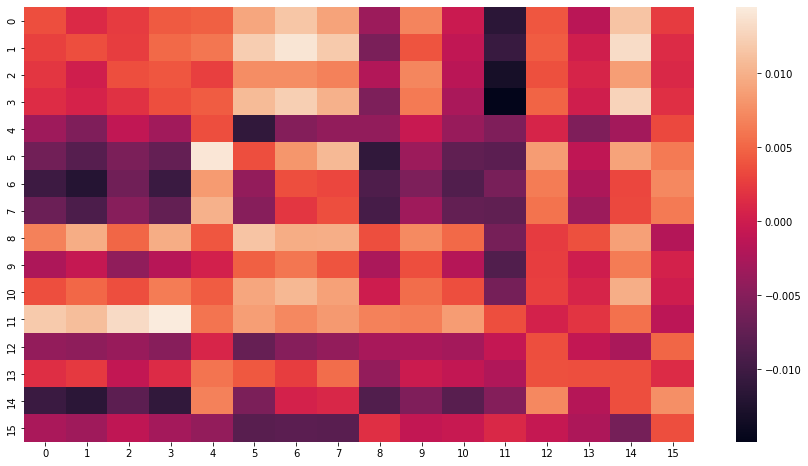

In [ ]:
tem=xcorr
heat_map(tem[0])

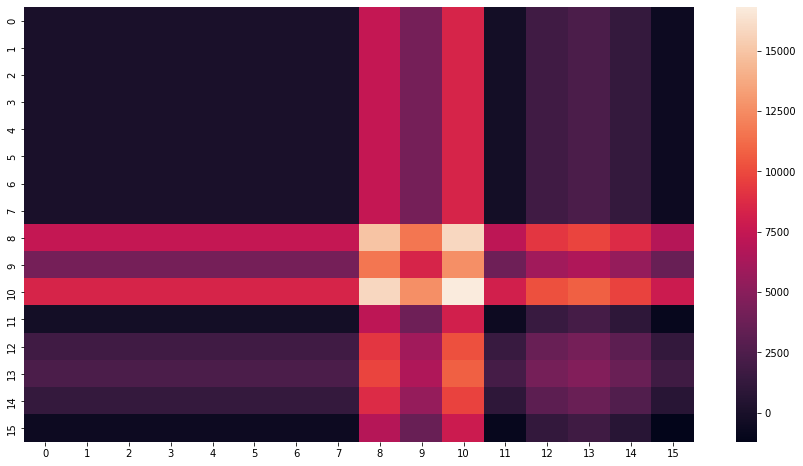

In [ ]:
heat_map(mean_f[2])

In [ ]:
print(mean_f[1])

[[0.4248, 0.401, 0.4929, 0.7496, 0.3797, 0.3988, 0.3229, 0.5417, 6782.1422, 8416.5529, 5419.3499, -2985.7435, 1009.6754, 1128.8453, 904.7792, 118.2163], [0.401, 0.3773, 0.4691, 0.7258, 0.3559, 0.375, 0.2991, 0.5179, 6782.1184, 8416.5292, 5419.3261, -2985.7673, 1009.6516, 1128.8215, 904.7554, 118.1925], [0.4929, 0.4691, 0.5609, 0.8176, 0.4478, 0.4669, 0.3909, 0.6098, 6782.2103, 8416.621, 5419.4179, -2985.6754, 1009.7435, 1128.9133, 904.8472, 118.2843], [0.7496, 0.7258, 0.8176, 1.0743, 0.7045, 0.7236, 0.6476, 0.8665, 6782.467, 8416.8777, 5419.6746, -2985.4188, 1010.0002, 1129.17, 905.1039, 118.541], [0.3797, 0.3559, 0.4478, 0.7045, 0.3346, 0.3537, 0.2778, 0.4966, 6782.0971, 8416.5078, 5419.3048, -2985.7886, 1009.6303, 1128.8002, 904.7341, 118.1712], [0.3988, 0.375, 0.4669, 0.7236, 0.3537, 0.3728, 0.2969, 0.5157, 6782.1162, 8416.5269, 5419.3238, -2985.7695, 1009.6494, 1128.8193, 904.7532, 118.1902], [0.3229, 0.2991, 0.3909, 0.6476, 0.2778, 0.2969, 0.221, 0.4398, 6782.0403, 8416.451, 5419.

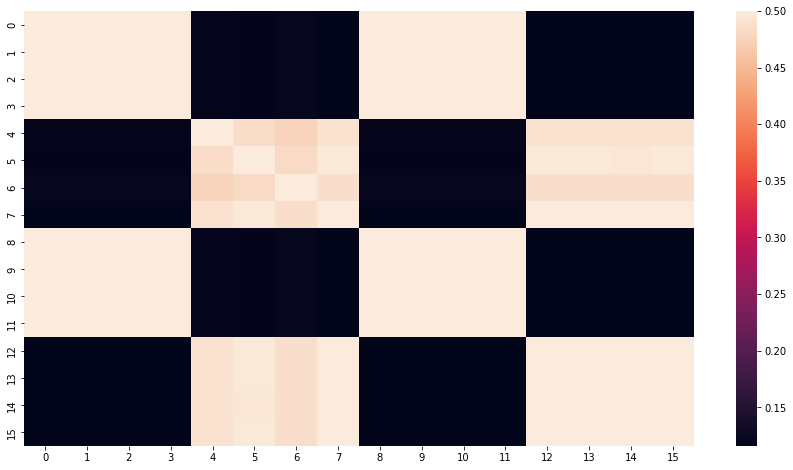

In [ ]:
heat_map(partial_mi_score[1])

Walk Data

In [ ]:
mi_score_walk=[]
partial_mi_score_walk=[]
mean_f_walk=[]
xcorr_walk=[]
pearson_corr_walk=[]


xcorr_walk,pearson_corr_walk,mi_score_walk,partial_mi_score_walk,mean_f_walk=get_features(walk_ac,walk_gy,walk_jerk_ac,walk_jerk_gy,walk_number)



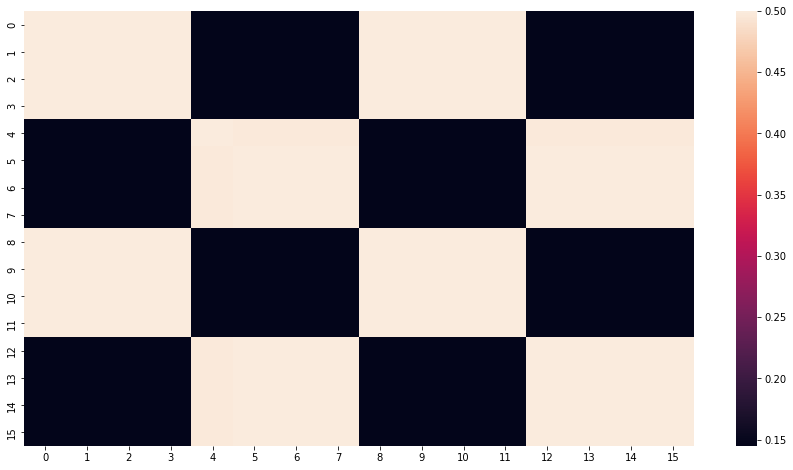

In [ ]:
heat_map(partial_mi_score_walk[0])

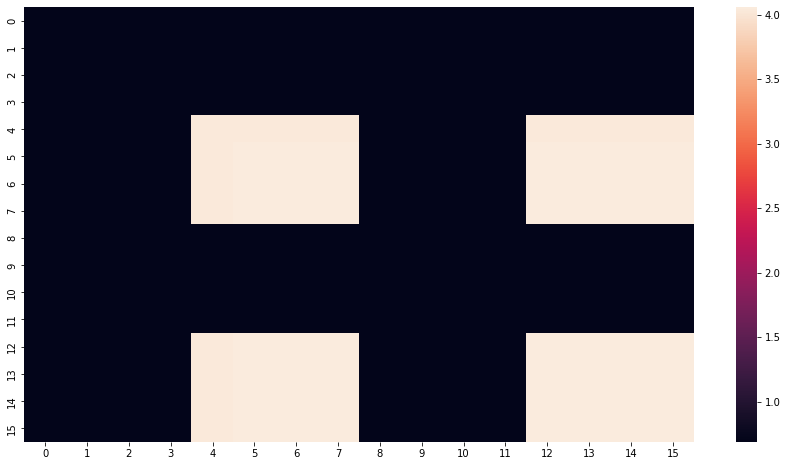

In [ ]:
heat_map(mi_score_walk[0])

In [ ]:
######Sitting feature map
mi_score_sit=[]
partial_mi_score_sit=[]
mean_f_sit=[]
xcorr_sit=[]
pearson_corr_sit=[]
xcorr_sit,pearson_corr_sit,mi_score_sit,partial_mi_score_sit,mean_f_sit=get_features(sit_ac,sit_gy,sit_jerk_ac,sit_jerk_gy,sit_number)


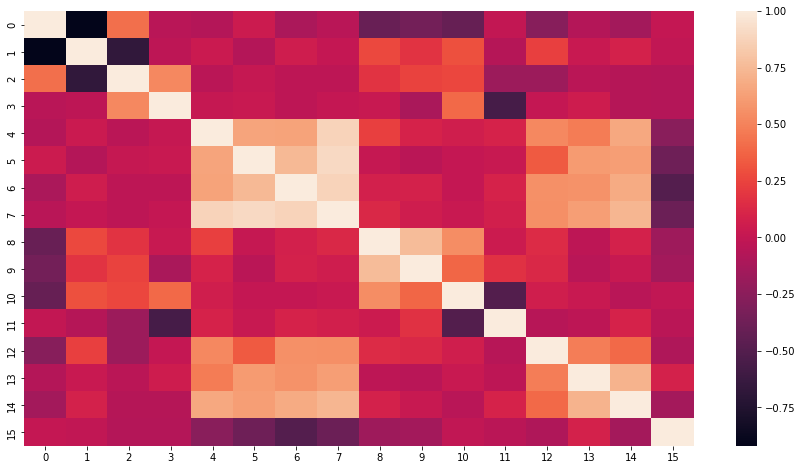

In [ ]:
heat_map(pearson_corr_sit[1])

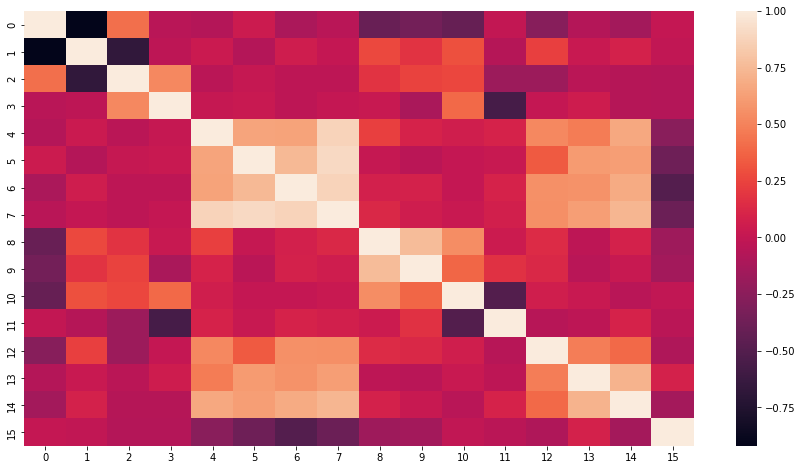

In [ ]:
heat_map(pearson_corr_sit[1])

In [ ]:
###### BSC feature map
mi_score_bsc=[]
partial_mi_score_bsc=[]
mean_f_bsc=[]
xcorr_bsc=[]
pearson_corr_bsc=[]

xcorr_bsc,pearson_corr_bsc,mi_score_bsc,partial_mi_score_bsc,mean_f_bsc=get_features(bsc_ac,bsc_gy,bsc_jerk_ac,bsc_jerk_gy,bsc_number)

In [ ]:
###### Standing feature map
mi_score_stand=[]
partial_mi_score_stand=[]
mean_f_stand=[]
xcorr_stand=[]
pearson_corr_stand=[]

xcorr_stand,pearson_corr_stand,mi_score_stand,partial_mi_score_stand,mean_f_stand=get_features(stand_ac,stand_gy,stand_jerk_ac,stand_jerk_gy,stand_number)




In [ ]:
###### Laying feature map
mi_score_laying=[]
partial_mi_score_laying=[]
mean_f_laying=[]
xcorr_laying=[]
pearson_corr_laying=[]

xcorr_laying,pearson_corr_laying,mi_score_laying,partial_mi_score_laying,mean_f_laying=get_features(laying_ac,laying_gy,laying_jerk_ac,laying_jerk_gy,laying_number)



In [ ]:

ffm="xcorr"
for i in range(fall_number):
  ffm="xcorr"+"_"+str(i)+".csv"
  poth='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm
  fd=pd.DataFrame(xcorr[i])
  fd.to_csv(poth)
  ffm="pearson_corr"+"_"+str(i)+".csv"
  poth='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm
  fd=pd.DataFrame(pearson_corr[i])
  fd.to_csv(poth)
  ffm="mi"+"_"+str(i)+".csv"
  poth='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm
  fd=pd.DataFrame(mi_score[i])
  fd.to_csv(poth)
  ffm="pmi"+"_"+str(i)+".csv"
  poth='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm
  fd=pd.DataFrame(partial_mi_score[i])
  fd.to_csv(poth)
  ffm="mean"+"_"+str(i)+".csv"
  poth='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm
  fd=pd.DataFrame(mean_f[i])
  fd.to_csv(poth)

for i in range(walk_number):
  ffm="xcorr_walk"+"_"+str(i)+".csv"
  poth='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm
  fd=pd.DataFrame(xcorr_walk[i])
  fd.to_csv(poth)
  ffm="pearson_corr_walk"+"_"+str(i)+".csv"
  poth='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm
  fd=pd.DataFrame(pearson_corr_walk[i])
  fd.to_csv(poth)
  ffm="mi_walk"+"_"+str(i)+".csv"
  poth='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm
  fd=pd.DataFrame(mi_score_walk[i])
  fd.to_csv(poth)
  ffm="pmi_walk"+"_"+str(i)+".csv"
  poth='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm
  fd=pd.DataFrame(partial_mi_score_walk[i])
  fd.to_csv(poth)
  ffm="mean_walk"+"_"+str(i)+".csv"
  poth='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm
  fd=pd.DataFrame(mean_f_walk[i])
  fd.to_csv(poth)

for i in range(sit_number):
  ffm="xcorr_sit"+"_"+str(i)+".csv"
  poth='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm
  fd=pd.DataFrame(xcorr_sit[i])
  fd.to_csv(poth)
  ffm="pearson_corr_sit"+"_"+str(i)+".csv"
  poth='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm
  fd=pd.DataFrame(pearson_corr_sit[i])
  fd.to_csv(poth)
  ffm="mi_sit"+"_"+str(i)+".csv"
  poth='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm
  fd=pd.DataFrame(mi_score_sit[i])
  fd.to_csv(poth)
  ffm="pmi_sit"+"_"+str(i)+".csv"
  poth='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm
  fd=pd.DataFrame(partial_mi_score_sit[i])
  fd.to_csv(poth)
  ffm="mean_sit"+"_"+str(i)+".csv"
  poth='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm
  fd=pd.DataFrame(mean_f_sit[i])
  fd.to_csv(poth)

for i in range(laying_number):
  ffm="xcorr_laying"+"_"+str(i)+".csv"
  poth='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm
  fd=pd.DataFrame(xcorr_laying[i])
  fd.to_csv(poth)
  ffm="pearson_corr_laying"+"_"+str(i)+".csv"
  poth='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm
  fd=pd.DataFrame(pearson_corr_laying[i])
  fd.to_csv(poth)
  ffm="mi_laying"+"_"+str(i)+".csv"
  poth='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm
  fd=pd.DataFrame(mi_score_laying[i])
  fd.to_csv(poth)
  ffm="pmi_laying"+"_"+str(i)+".csv"
  poth='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm
  fd=pd.DataFrame(partial_mi_score_laying[i])
  fd.to_csv(poth)
  ffm="mean_laying"+"_"+str(i)+".csv"
  poth='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm
  fd=pd.DataFrame(mean_f_laying[i])
  fd.to_csv(poth)

for i in range(stand_number):
  ffm="xcorr_stand"+"_"+str(i)+".csv"
  poth='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm
  fd=pd.DataFrame(xcorr_stand[i])
  fd.to_csv(poth)
  ffm="pearson_corr_stand"+"_"+str(i)+".csv"
  poth='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm
  fd=pd.DataFrame(pearson_corr_stand[i])
  fd.to_csv(poth)
  ffm="mi_stand"+"_"+str(i)+".csv"
  poth='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm
  fd=pd.DataFrame(mi_score_stand[i])
  fd.to_csv(poth)
  ffm="pmi_stand"+"_"+str(i)+".csv"
  poth='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm
  fd=pd.DataFrame(partial_mi_score_stand[i])
  fd.to_csv(poth)
  ffm="mean_stand"+"_"+str(i)+".csv"
  poth='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm
  fd=pd.DataFrame(mean_f_stand[i])
  fd.to_csv(poth)

for i in range(bsc_number):
  ffm="xcorr_bsc"+"_"+str(i)+".csv"
  poth='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm
  fd=pd.DataFrame(xcorr_bsc[i])
  fd.to_csv(poth)
  ffm="pearson_corr_bsc"+"_"+str(i)+".csv"
  poth='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm
  fd=pd.DataFrame(pearson_corr_bsc[i])
  fd.to_csv(poth)
  ffm="mi_bsc"+"_"+str(i)+".csv"
  poth='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm
  fd=pd.DataFrame(mi_score_bsc[i])
  fd.to_csv(poth)
  ffm="pmi_bsc"+"_"+str(i)+".csv"
  poth='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm
  fd=pd.DataFrame(partial_mi_score_bsc[i])
  fd.to_csv(poth)
  ffm="mean_bsc"+"_"+str(i)+".csv"
  poth='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm
  fd=pd.DataFrame(mean_f_bsc[i])
  fd.to_csv(poth)

